In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv("C:\\Users\\NADEEM BAIG\\Downloads\\Stroke Dataset\\healthcare-dataset-stroke-data.csv")

In [3]:
raw_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# Looking for missing data
missing_data=raw_data.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

id
False    5110
Name: id, dtype: int64

gender
False    5110
Name: gender, dtype: int64

age
False    5110
Name: age, dtype: int64

hypertension
False    5110
Name: hypertension, dtype: int64

heart_disease
False    5110
Name: heart_disease, dtype: int64

ever_married
False    5110
Name: ever_married, dtype: int64

work_type
False    5110
Name: work_type, dtype: int64

Residence_type
False    5110
Name: Residence_type, dtype: int64

avg_glucose_level
False    5110
Name: avg_glucose_level, dtype: int64

bmi
False    4909
True      201
Name: bmi, dtype: int64

smoking_status
False    5110
Name: smoking_status, dtype: int64

stroke
False    5110
Name: stroke, dtype: int64



In [5]:
raw_data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [6]:
raw_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
#drop the ID Column
raw_data.drop(columns = ['id'], inplace = True)

In [8]:
# Replace the missing values with mean of bmi attribute
raw_data['bmi'].fillna(np.round(raw_data['bmi'].mean(), 1), inplace = True)

In [9]:
raw_data.isnull().sum(axis = 0)

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
raw_data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [11]:
raw_data = raw_data[raw_data['gender'] != 'Other']

In [12]:
raw_data['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [13]:
# Create a new column for normalized age
raw_data['age_norm']=(raw_data['age']-raw_data['age'].min())/(raw_data['age'].max()-raw_data['age'].min())

# Create a new column for normalized avg glucose level
raw_data['avg_glucose_level_norm']=(raw_data['avg_glucose_level']-raw_data['avg_glucose_level'].min())/(raw_data['avg_glucose_level'].max()-raw_data['avg_glucose_level'].min())

# Create a new column for normalized bmi
raw_data['bmi_norm']=(raw_data['bmi']-raw_data['bmi'].min())/(raw_data['bmi'].max()-raw_data['bmi'].min())

In [14]:
raw_data['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [15]:
raw_data['Residence_type'].value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [16]:
raw_data['ever_married'].value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [17]:
raw_data['work_type'] = raw_data['work_type'].replace({'children' : 'Never_worked'})

In [18]:
raw_data['work_type'].value_counts()

Private          2924
Self-employed     819
Never_worked      709
Govt_job          657
Name: work_type, dtype: int64

In [19]:
raw_data.drop(columns = ['age','avg_glucose_level','bmi'], inplace=True)

In [20]:
raw_data.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,age_norm,avg_glucose_level_norm,bmi_norm
0,Male,0,1,Yes,Private,Urban,formerly smoked,1,0.816895,0.801265,0.301260
1,Female,0,0,Yes,Self-employed,Rural,never smoked,1,0.743652,0.679023,0.213058
2,Male,0,1,Yes,Private,Rural,never smoked,1,0.975586,0.234512,0.254296
3,Female,0,0,Yes,Private,Urban,smokes,1,0.597168,0.536008,0.276060
4,Female,1,0,Yes,Self-employed,Rural,never smoked,1,0.963379,0.549349,0.156930


In [21]:
#set color for data visualization
sns.set(rc={"axes.facecolor":"#EAE0D5","figure.facecolor":"#EAE0D5", "grid.color":"#C6AC8F",
            "axes.edgecolor":"#C6AC8F", "axes.labelcolor":"#0A0908", "xtick.color":"#0A0908",
            "ytick.color":"#0A0908"})

palettes = ['#9B856A', '#475962', '#598392', '#124559', '#540B0E']
cmap = colors.ListedColormap(['#9B856A', '#124559', '#475962', '#598392'])

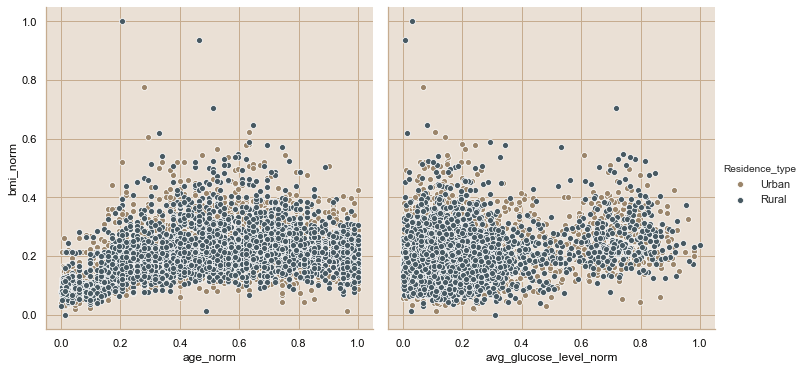

In [22]:
sns.pairplot(data=raw_data, y_vars='bmi_norm', x_vars=['age_norm', 'avg_glucose_level_norm'], hue='Residence_type',
             size=5, palette=['#9B856A', '#475962'])

<AxesSubplot:xlabel='gender', ylabel='bmi_norm'>

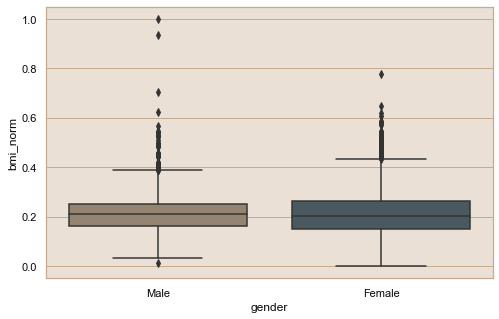

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(data=raw_data, x='gender', y='bmi_norm', palette=palettes)

In [25]:
#total number of male and female in dataset
value = raw_data['gender'].value_counts().sort_values().values

#percentage of male and female
percent = (raw_data['gender'].value_counts()*100/len(raw_data)).sort_values().values

idx = raw_data['gender'].value_counts().sort_values().index.values

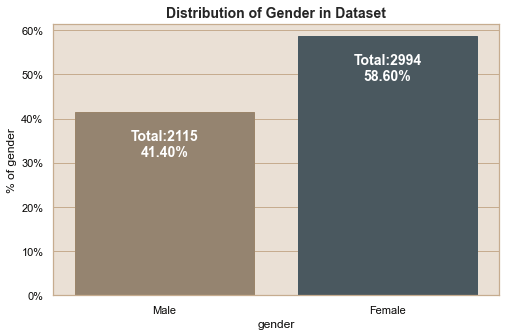

In [26]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=raw_data, x=idx, y=percent, palette=palettes, edgecolor=palettes)

#set y axis to percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.set_title('Distribution of Gender in Dataset', weight='bold', fontsize=14)
ax.set_xlabel('gender')
ax.set_ylabel('% of gender')

#place text in barplot
for i,v in enumerate(percent):
    #(x position, y position, text, ...)
    ax.text(i, v-10, 'Total:{}\n{:.2f}%'.format(value[i],v), horizontalalignment='center', weight='bold', color='white', fontsize=14)

<AxesSubplot:>

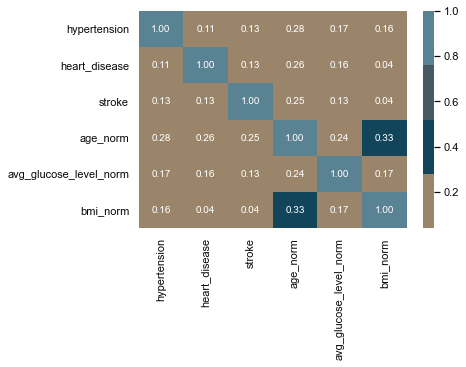

In [27]:
sns.heatmap(raw_data.corr(), annot=True, fmt='.2f', cmap=cmap)

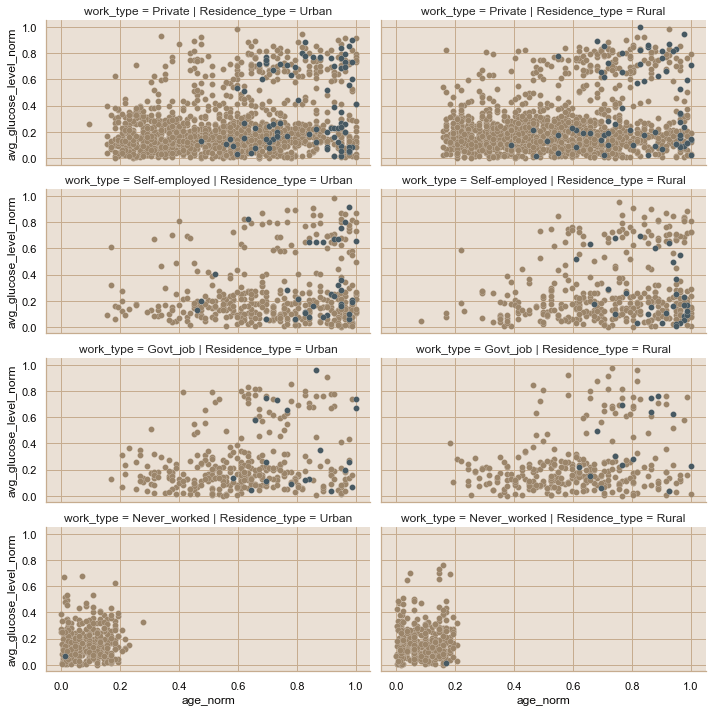

In [28]:
g = sns.FacetGrid(data=raw_data, row='work_type', col='Residence_type', hue='stroke',
                  size=2.5, aspect=2, palette=palettes)
g.map(plt.scatter, 'age_norm', 'avg_glucose_level_norm', edgecolor='#EAE0D5', lw=0.2)

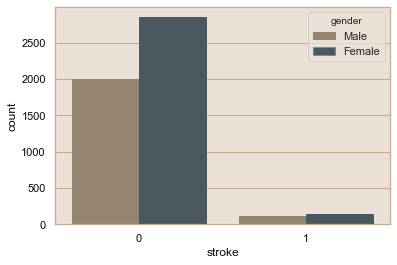

In [29]:
ax = sns.countplot(data=raw_data, x='stroke', hue='gender', palette=palettes, edgecolor=palettes)

for patch in ax.patches:
    clr = patch.get_facecolor()
    patch.set_edgecolor(clr)

In [30]:
smoking = raw_data['smoking_status'].value_counts()

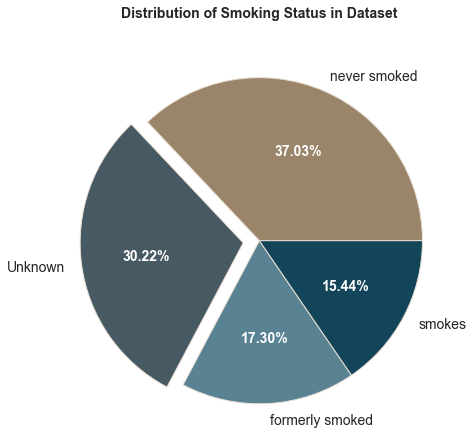

In [31]:
fig, ax = plt.subplots(figsize =(8, 5))
wedges, texts, autotexts = ax.pie(x=smoking, autopct="%.2f%%", labels=smoking.index, explode=[0,0.15,0,0], colors=palettes,
        radius=1.5, wedgeprops={ 'linewidth' : 1, 'edgecolor' : '#EAE0D5' }, textprops=dict(fontsize=14))

ax.set_title('Distribution of Smoking Status in Dataset', y=1.3, weight='bold', fontsize=14)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

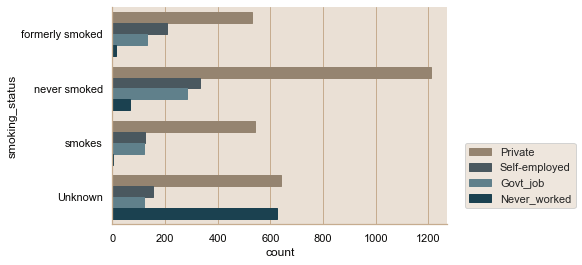

In [32]:
ax = sns.countplot(data=raw_data, hue='work_type', y='smoking_status', palette=palettes, orient='h')

#to change edgecolor
for patch in ax.patches:
    clr = patch.get_facecolor()
    patch.set_edgecolor(clr)

ax.legend(bbox_to_anchor=(1.4, 0.4))
sns.despine()

<AxesSubplot:xlabel='smoking_status', ylabel='age_norm'>

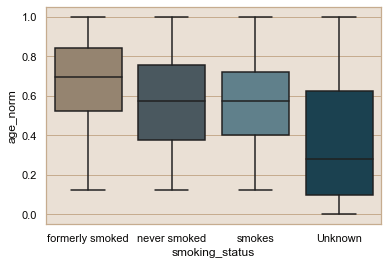

In [33]:
sns.boxplot(data=raw_data, x='smoking_status', y='age_norm', palette=palettes)

In [34]:
def smoke(text):
    if text == 'never smoked' or text == 'Unknown':
        return 'never smoked'
    else:
        return 'smoke'

In [35]:
raw_data['smoking_status'] = raw_data['smoking_status'].apply(smoke)

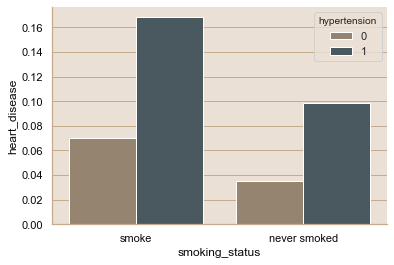

In [36]:
x = sns.barplot(data=raw_data, x='smoking_status', y='heart_disease', hue='hypertension', palette=palettes, ci=None)

#to change edgecolor
for patch in ax.patches:
    clr = patch.get_facecolor()
    patch.set_edgecolor(clr)

sns.despine()

Text(0.5, 1.1, 'Chance of Getting Stroke Based on Smoking Behavior')

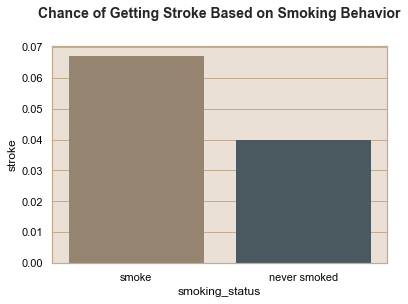

In [37]:
ax = sns.barplot(data=raw_data, x='smoking_status', y='stroke',
            palette=palettes, edgecolor=palettes, ci=None)

ax.set_title('Chance of Getting Stroke Based on Smoking Behavior', y=1.1, weight='bold', fontsize=14)

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
raw_data['Gender'] = le.fit_transform(raw_data['gender'])
raw_data['Gender'].value_counts()

0    2994
1    2115
Name: Gender, dtype: int64

In [39]:
raw_data.drop(columns = ['gender'],inplace=True)

In [40]:
raw_data['Married'] = le.fit_transform(raw_data['ever_married'])
raw_data['Married'].value_counts()

1    3353
0    1756
Name: Married, dtype: int64

In [41]:
raw_data.drop(columns = ['ever_married'],inplace=True)
raw_data.head()

,hypertension,heart_disease,work_type,Residence_type,smoking_status,stroke,age_norm,avg_glucose_level_norm,bmi_norm,Gender,Married
0,0,1,Private,Urban,smoke,1,0.816895,0.801265,0.301260,1,1
1,0,0,Self-employed,Rural,never smoked,1,0.743652,0.679023,0.213058,0,1
2,0,1,Private,Rural,never smoked,1,0.975586,0.234512,0.254296,1,1
3,0,0,Private,Urban,smoke,1,0.597168,0.536008,0.276060,0,1
4,1,0,Self-employed,Rural,never smoked,1,0.963379,0.549349,0.156930,0,1


In [42]:
raw_data['residence_type'] = le.fit_transform(raw_data['Residence_type'])
raw_data.head()

,hypertension,heart_disease,work_type,Residence_type,smoking_status,stroke,age_norm,avg_glucose_level_norm,bmi_norm,Gender,Married,residence_type
0,0,1,Private,Urban,smoke,1,0.816895,0.801265,0.301260,1,1,1
1,0,0,Self-employed,Rural,never smoked,1,0.743652,0.679023,0.213058,0,1,0
2,0,1,Private,Rural,never smoked,1,0.975586,0.234512,0.254296,1,1,0
3,0,0,Private,Urban,smoke,1,0.597168,0.536008,0.276060,0,1,1
4,1,0,Self-employed,Rural,never smoked,1,0.963379,0.549349,0.156930,0,1,0


In [45]:
df_dummies = pd.get_dummies(raw_data['work_type'])
df_dummies.head()

,Govt_job,Never_worked,Private,Self-employed
0,0,0,1,0
1,0,0,0,1
2,0,0,1,0
3,0,0,1,0
4,0,0,0,1


In [46]:
data = pd.concat(objs = [raw_data, df_dummies], axis=1 )

In [47]:
data.drop(columns = ['work_type','Self-employed'], inplace=True)

In [48]:
data['Smoking_status'] = le.fit_transform(data['smoking_status'])
data['Smoking_status'].value_counts()

0    3436
1    1673
Name: Smoking_status, dtype: int64

In [49]:
data.drop(columns = ['smoking_status'],inplace=True)

In [50]:
data.head()

,hypertension,heart_disease,stroke,age_norm,avg_glucose_level_norm,bmi_norm,Gender,Married,residence_type,Govt_job,Never_worked,Private,Smoking_status
0,0,1,1,0.816895,0.801265,0.301260,1,1,1,0,0,1,1
1,0,0,1,0.743652,0.679023,0.213058,0,1,0,0,0,0,0
2,0,1,1,0.975586,0.234512,0.254296,1,1,0,0,0,1,0
3,0,0,1,0.597168,0.536008,0.276060,0,1,1,0,0,1,1
4,1,0,1,0.963379,0.549349,0.156930,0,1,0,0,0,0,0


In [51]:
shuffled_data = data.sample(frac=1).reset_index()
dataframe = pd.DataFrame(shuffled_data)
dataframe.head()

,index,hypertension,heart_disease,stroke,age_norm,avg_glucose_level_norm,bmi_norm,Gender,Married,residence_type,Govt_job,Never_worked,Private,Smoking_status
0,169,0,0,1,0.987793,0.168129,0.241695,1,1,0,0,0,0,0
1,4292,0,0,0,0.743652,0.135306,0.253150,1,1,0,0,0,0,1
2,1459,0,0,0,0.597168,0.132582,0.103093,0,1,0,1,0,0,1
3,698,0,0,0,0.365234,0.159311,0.147766,0,1,0,0,0,1,1
4,1723,0,0,0,0.694824,0.758840,0.269187,0,1,1,1,0,0,1


In [52]:
dataframe.drop(columns=['index'],inplace=True)
dataframe.head()

,hypertension,heart_disease,stroke,age_norm,avg_glucose_level_norm,bmi_norm,Gender,Married,residence_type,Govt_job,Never_worked,Private,Smoking_status
0,0,0,1,0.987793,0.168129,0.241695,1,1,0,0,0,0,0
1,0,0,0,0.743652,0.135306,0.253150,1,1,0,0,0,0,1
2,0,0,0,0.597168,0.132582,0.103093,0,1,0,1,0,0,1
3,0,0,0,0.365234,0.159311,0.147766,0,1,0,0,0,1,1
4,0,0,0,0.694824,0.758840,0.269187,0,1,1,1,0,0,1


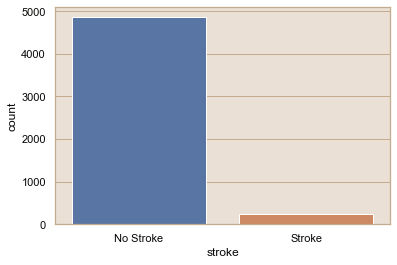

In [53]:
f = sns.countplot(dataframe['stroke'])
f.set_xticklabels(['No Stroke','Stroke'])
plt.show()

In [54]:
from collections import Counter
counter = Counter(dataframe['stroke'])
print(counter)

Counter({0: 4860, 1: 249})


In [55]:
X = dataframe.drop('stroke', axis=1)
y = dataframe['stroke']

In [56]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score

In [62]:
# define pipeline
model = RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=20,
                       n_jobs=-1, random_state=42)
over = SMOTE(sampling_strategy={0:4400, 1:2800})
under = RandomUnderSampler(sampling_strategy={0:3200, 1:2800})
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10 , n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.823
